<a href="https://colab.research.google.com/github/anandvardhanit84/GenerativeAI/blob/main/L1SupportAutomation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
#import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from google.colab import drive
drive.mount('/content/drive')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/customer-support-ticket-dataset/customer_support_tickets.csv')
df.head()

nums_rows, nums_columns = df.shape
print(f'Number of rows: {nums_rows}\nNumber of columns: {nums_columns}')

#Checking duplicate line
duplicate = df.duplicated().any()
duplicate

df.info()
cat_cols  = df.select_dtypes(['object']).columns
int_cols  = df.select_dtypes(['int64']).columns
float_cols = df.select_dtypes(['float']).columns
print(cat_cols)
print(int_cols)
print(float_cols)

Number of rows: 8469
Number of columns: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority    

In [ ]:
#Cleaning data

#Convert to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], format = '%Y-%m-%d')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], format = '%Y-%m-%d %H:%M:%S')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], format = '%Y-%m-%d %H:%M:%S')

df_ticket = df.drop(columns = ['Ticket ID'], axis = 1)

#Cleaning data
df_ticket['Resolution'] = df_ticket['Resolution'].fillna('None')
df_ticket['First Response Time'] = df_ticket['First Response Time'].fillna('No response')
df_ticket['Time to Resolution'] = df_ticket['Time to Resolution'].fillna('No resolution')
df_ticket['Customer Satisfaction Rating'] = df_ticket['Customer Satisfaction Rating'].fillna('No rating')

df_ticket.isnull().sum()

Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

70
18


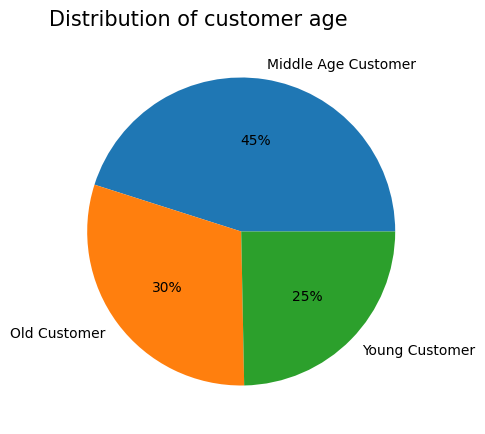

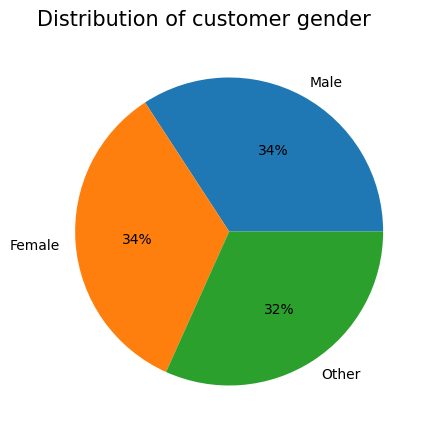

 Total of products was purchased: 42


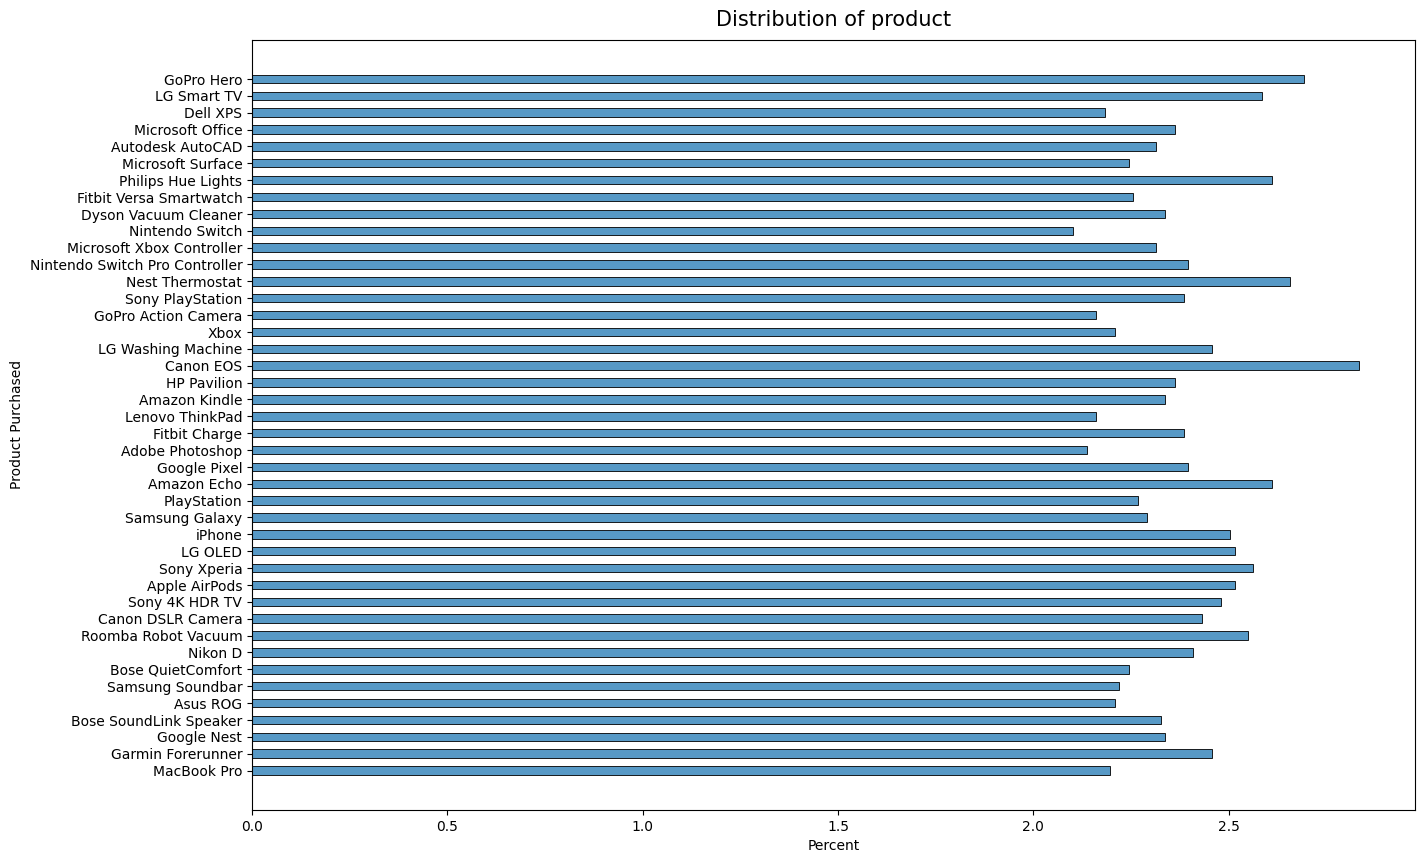

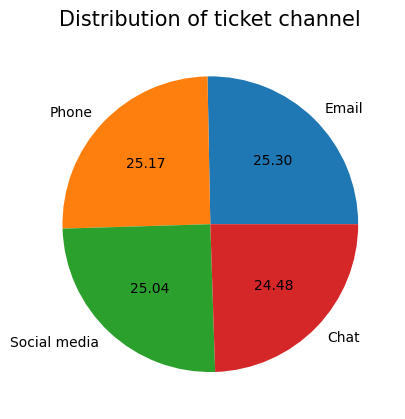

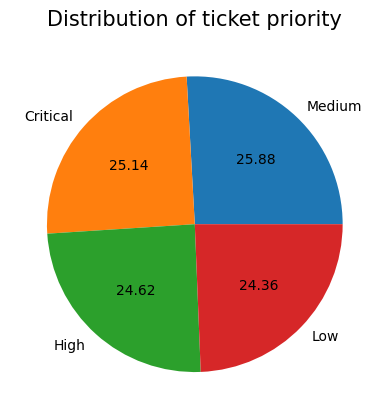

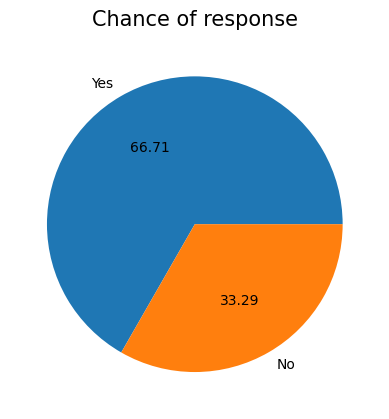

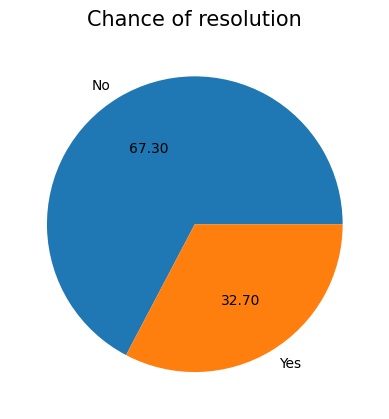

<class 'pandas.core.series.Series'>
RangeIndex: 8469 entries, 0 to 8468
Series name: Customer Satisfaction Rating
Non-Null Count  Dtype 
--------------  ----- 
8469 non-null   object
dtypes: object(1)
memory usage: 66.3+ KB


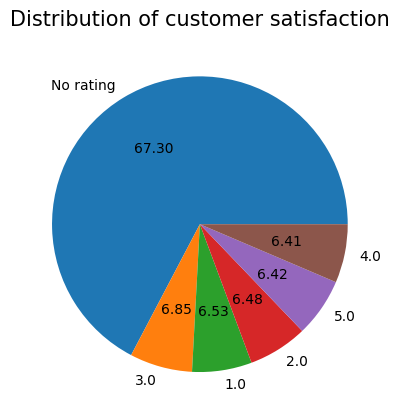

In [ ]:
#Discover some distribution

#Distribution of customer age
print(df_ticket['Customer Age'].max())
print(df_ticket['Customer Age'].min())

age = []
for i in df_ticket['Customer Age']:
    if i<=30:
        age.append('Young Customer')
    elif 30<i<55:
        age.append('Middle Age Customer')
    else:
        age.append('Old Customer')
df_ticket['Type of Customer'] = age

chart_age = df_ticket['Type of Customer'].value_counts()
chart_gen = df_ticket['Customer Gender'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(chart_age, labels = chart_age.index, autopct='%.0f%%')
plt.title('Distribution of customer age', loc = 'left', pad = 10, size = 15)
plt.show()

#b. Distribution of customer gender
chart_gen = df_ticket['Customer Gender'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(chart_gen, labels = chart_gen.index, autopct='%.0f%%')
plt.title('Distribution of customer gender', loc = 'left', pad = 10, size = 15)
plt.show()

#c. Distribution of product

unique = len(df_ticket['Product Purchased'].unique())
print(f' Total of products was purchased: {unique}')

#Plot chart
plt.figure(figsize = (15,10))
sns.histplot(data = df_ticket, y = 'Product Purchased', stat = 'percent', shrink = 0.5)
plt.title('Distribution of product', loc = 'center', pad = 10, size = 15)
plt.show()

#d. Distribution of ticket channel

chart_chan = df_ticket['Ticket Channel'].value_counts()
plt.pie(chart_chan, labels = chart_chan.index, autopct = '%.2f')
plt.title('Distribution of ticket channel', loc = 'center', pad = 10, size = 15)
plt.show()

#d. Distribution of ticket priority
chart_prio = df_ticket['Ticket Priority'].value_counts()
plt.pie(chart_prio, labels = chart_prio.index, autopct = '%.2f')
plt.title('Distribution of ticket priority', loc = 'center', pad = 10, size = 15)
plt.show()

#e. Chance of response
chance = []
for i in df_ticket['First Response Time']:
    if i == 'No response':
        chance.append('No')
    else:
        chance.append('Yes')
df_ticket['Response'] = chance

chart_res = df_ticket['Response'].value_counts()
plt.pie(chart_res, labels = chart_res.index, autopct = '%.2f')
plt.title('Chance of response', loc = 'center', pad = 10, size = 15)
plt.show()


#f. Chance of resolution
chance_r = []
for i in df_ticket['Time to Resolution']:
    if i == 'No resolution':
        chance_r.append('No')
    else:
        chance_r.append('Yes')
df_ticket['Resolution_bin'] = chance_r

chart_re = df_ticket['Resolution_bin'].value_counts()
plt.pie(chart_re, labels = chart_re.index, autopct = '%.2f')
plt.title('Chance of resolution', loc = 'center', pad = 10, size = 15)
plt.show()

#g. Distribution of customer satisfaction rating
#Convert 'Customer Satisfaction Rating' columns into object type
df_ticket['Customer Satisfaction Rating'] = df_ticket['Customer Satisfaction Rating'].astype('object')
df_ticket['Customer Satisfaction Rating'].info()
chart_satis = df_ticket['Customer Satisfaction Rating'].value_counts()
plt.pie(chart_satis, labels = chart_satis.index, autopct = '%.2f')
plt.title('Distribution of customer satisfaction', loc = 'center', pad = 10, size = 15)
plt.show()


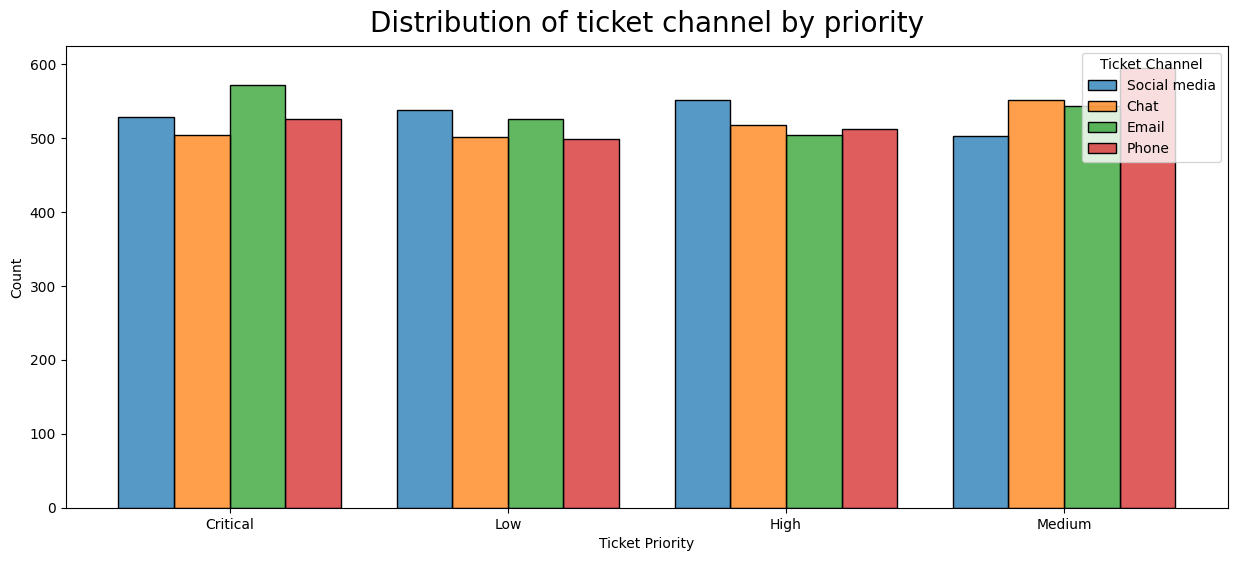

Ticket status: ['Pending Customer Response', 'Closed', 'Open']


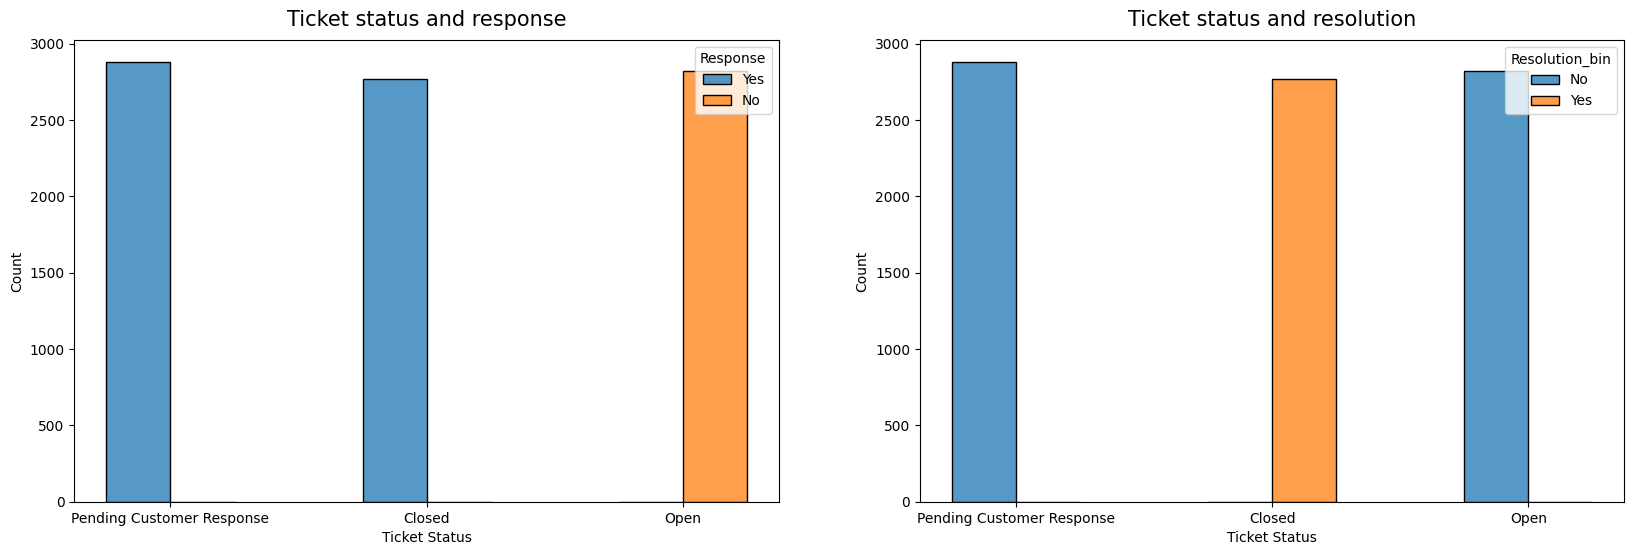

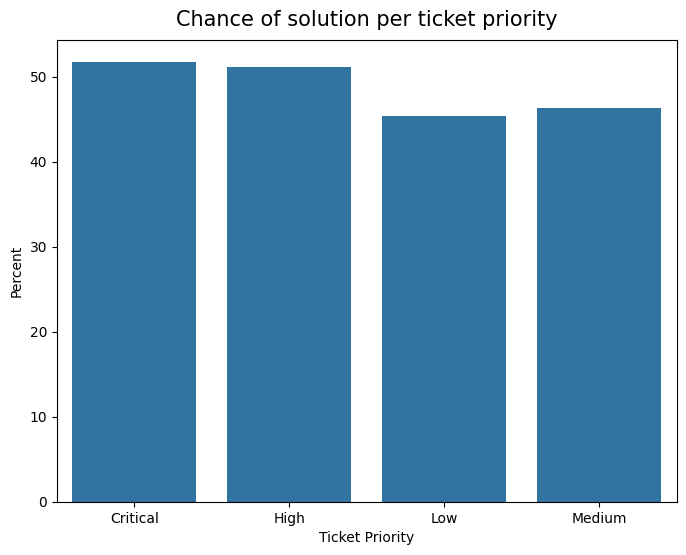

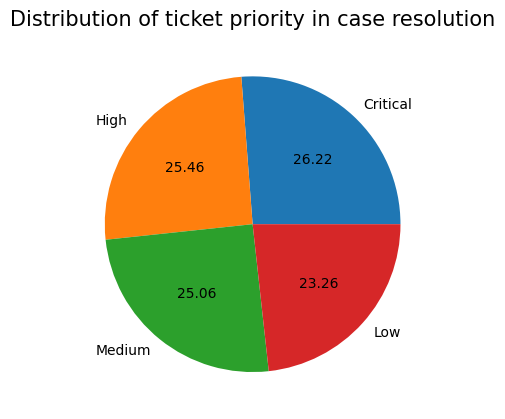

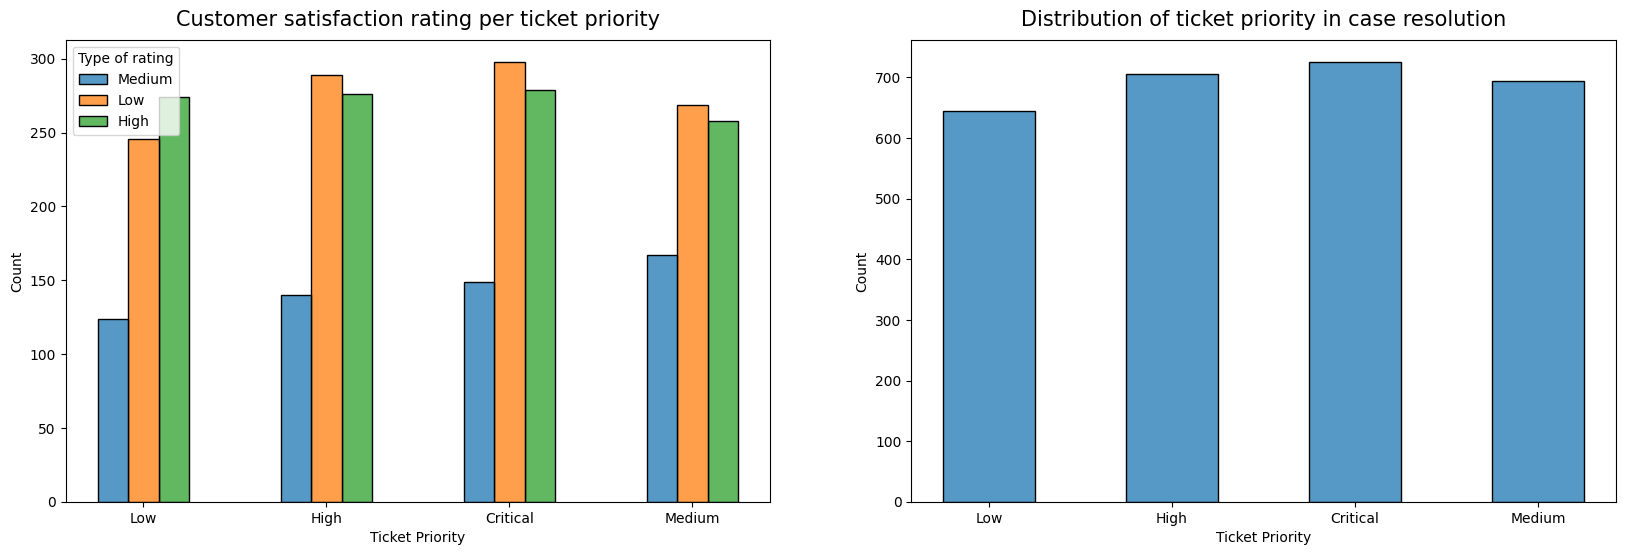

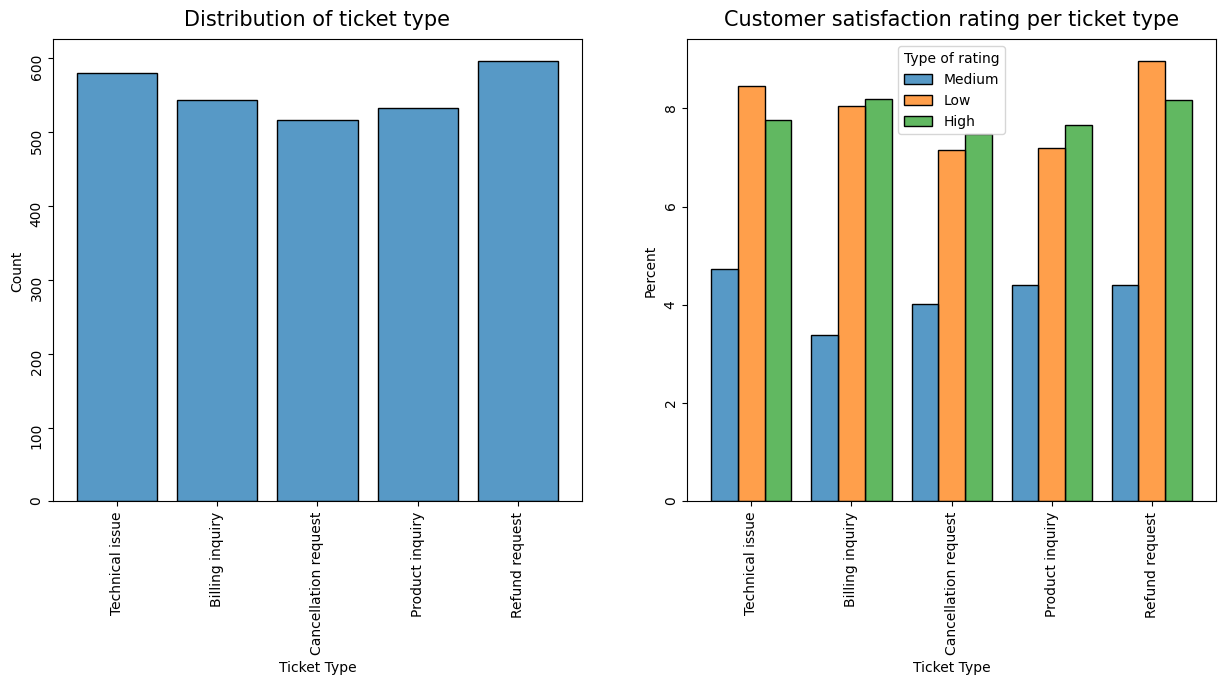

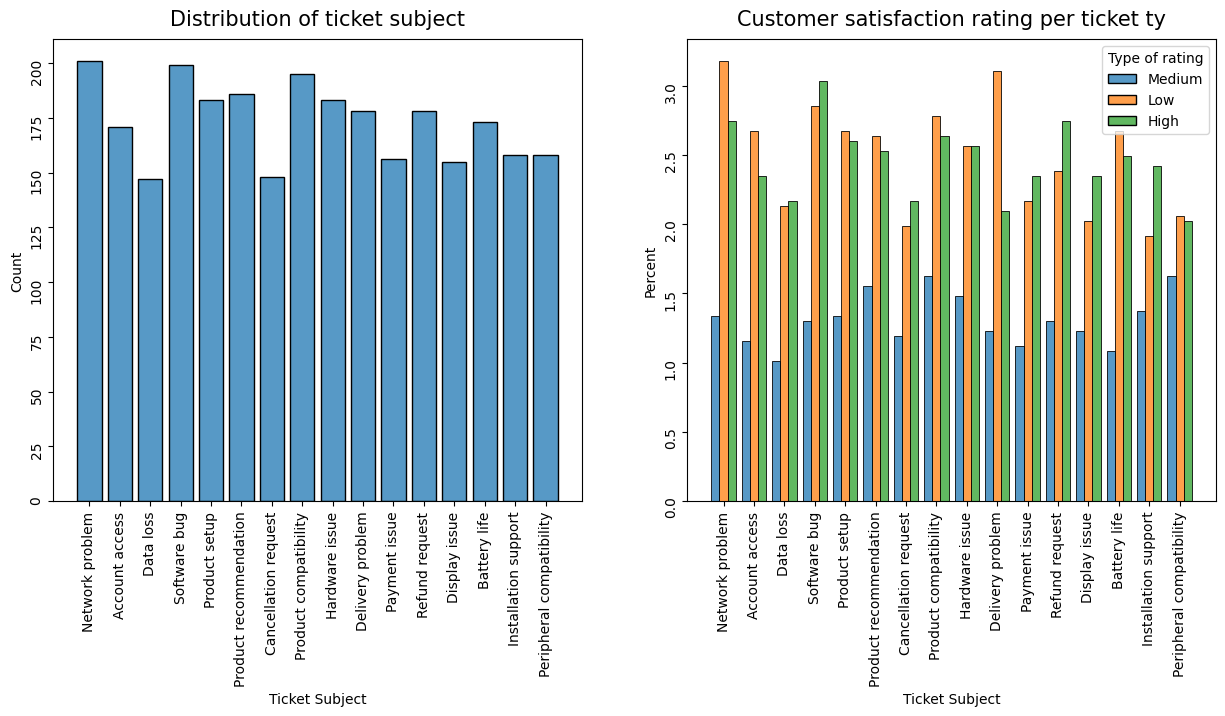

In [ ]:
#Discover some relationships
#Ticket channel and ticket priority
plt.figure(figsize = (15,6))
sns.histplot(df_ticket, hue = 'Ticket Channel', x = 'Ticket Priority',multiple = 'dodge', shrink = 0.8)
plt.title('Distribution of ticket channel by priority', loc = 'center', pad = 10, size = 20)
plt.show()

#Ticket status
ticket_st = df_ticket['Ticket Status'].unique()
print(f'Ticket status: {list(ticket_st)}')

fig, axes = plt.subplots(1,2, figsize = (20,6))
sns.histplot(df_ticket, x = 'Ticket Status', hue = 'Response',multiple = 'dodge', shrink = 0.5, ax = axes[0])
sns.histplot(df_ticket, x = 'Ticket Status', hue = 'Resolution_bin',multiple = 'dodge', shrink = 0.5, ax = axes[1])
axes[0].set_title('Ticket status and response',loc = 'center', pad = 10, size = 15)
axes[1].set_title('Ticket status and resolution',loc = 'center', pad = 10, size = 15)
plt.show()

#Ticket priority and solution
#Create a pivot table for caculating
priority = pd.pivot_table(df_ticket, index = ['Ticket Priority'], values = ['Customer Name'], columns = ['Resolution_bin'], aggfunc = len).reset_index()
priority = priority.rename(columns = {'Customer Name': 'Chance of Solution'})
priority['Percent'] = (priority['Chance of Solution']['Yes']/priority['Chance of Solution']['No'])*100
priority

plt.figure(figsize = (8,6))
sns.barplot(priority, x = 'Ticket Priority', y = 'Percent')
plt.title('Chance of solution per ticket priority', loc = 'center', pad = 10, size = 15)
plt.show()

#Customer satisfaction rating
rating = pd.pivot_table(df_ticket, index = ['Customer Satisfaction Rating'], values= ['Customer Name'], columns = ['Resolution_bin'], aggfunc = len).reset_index()
rating = rating.rename(columns = {'Customer Name': 'Resolution'})
rating

#Create new dataframe
df_resolution = df_ticket[df_ticket['Resolution_bin'] =='Yes']
df_resolution.head()

chart_reprio = df_resolution['Ticket Priority'].value_counts()
plt.pie(chart_reprio, labels = chart_reprio.index, autopct = '%.2f')
plt.title('Distribution of ticket priority in case resolution', loc = 'center', pad = 10, size = 15)
plt.show()

rating = []
for i in df_resolution['Customer Satisfaction Rating']:
    if i<=2:
        rating.append('Low')
    elif i==3:
        rating.append('Medium')
    else:
        rating.append('High')
df_resolution['Type of rating'] = rating

#Customer satisfaction rating and ticket priority
fig, axes = plt.subplots(1,2, figsize = (20,6))
sns.histplot(df_resolution, x = 'Ticket Priority', hue = 'Type of rating' ,multiple = 'dodge', shrink = 0.5, ax = axes[0])
sns.histplot(df_resolution['Ticket Priority'], shrink = 0.5, ax = axes[1])
axes[0].set_title('Customer satisfaction rating per ticket priority', loc = 'center', pad = 10, size = 15)
axes[1].set_title('Distribution of ticket priority in case resolution', loc = 'center', pad = 10, size = 15)
plt.show()

#Customer satisfaction rating and ticket type
fig, axes = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df_resolution['Ticket Type'], shrink = 0.8, ax = axes[0])
sns.histplot(hue = df_resolution['Type of rating'], x = df_resolution['Ticket Type'], multiple = 'dodge', shrink = 0.8, stat = 'percent', ax = axes[1])
axes[0].tick_params(labelrotation = 90)
axes[1].tick_params(labelrotation = 90)
axes[0].set_title('Distribution of ticket type', loc = 'center', pad = 10, size = 15)
axes[1].set_title('Customer satisfaction rating per ticket type', loc = 'center', pad = 10, size = 15)
plt.show()

#Customer satisfaction rating and ticket subject
fig, axes = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df_resolution['Ticket Subject'], shrink = 0.8, ax = axes[0])
sns.histplot(hue = df_resolution['Type of rating'], x = df_resolution['Ticket Subject'], multiple = 'dodge', shrink = 0.8, stat = 'percent', ax = axes[1])
axes[0].tick_params(labelrotation = 90)
axes[1].tick_params(labelrotation = 90)
axes[0].set_title('Distribution of ticket subject', loc = 'center', pad = 10, size = 15)
axes[1].set_title('Customer satisfaction rating per ticket ty', loc = 'center', pad = 10, size = 15)
plt.show()

,words,count
0,piece,29
1,bit,25
2,available,25
3,time,25
4,common,25
5,behavior,25
6,rate,25
7,camera,24
8,cut,24
9,expect,24


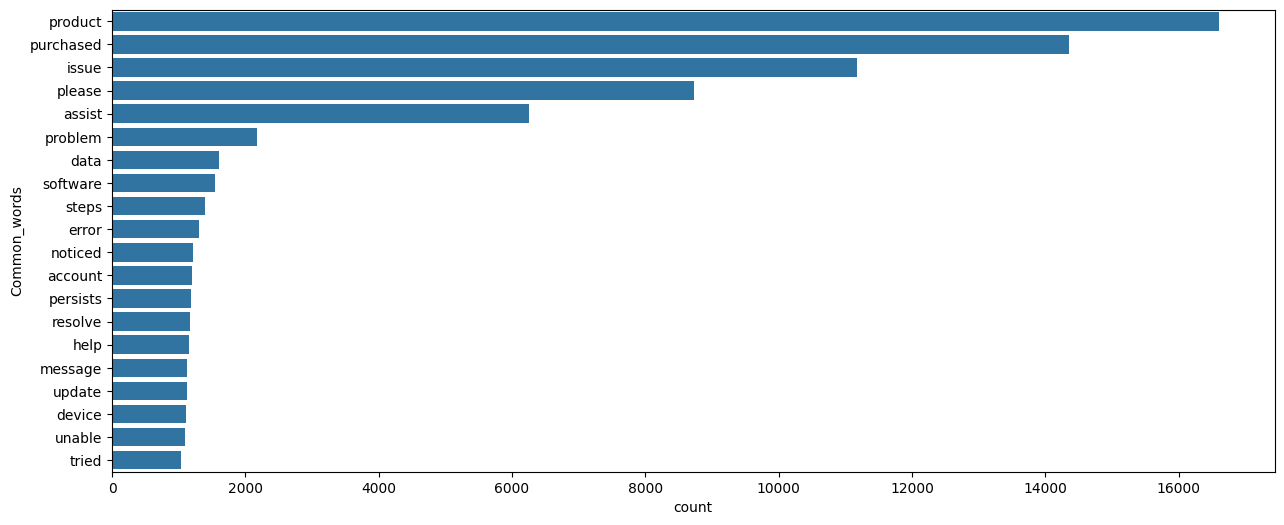

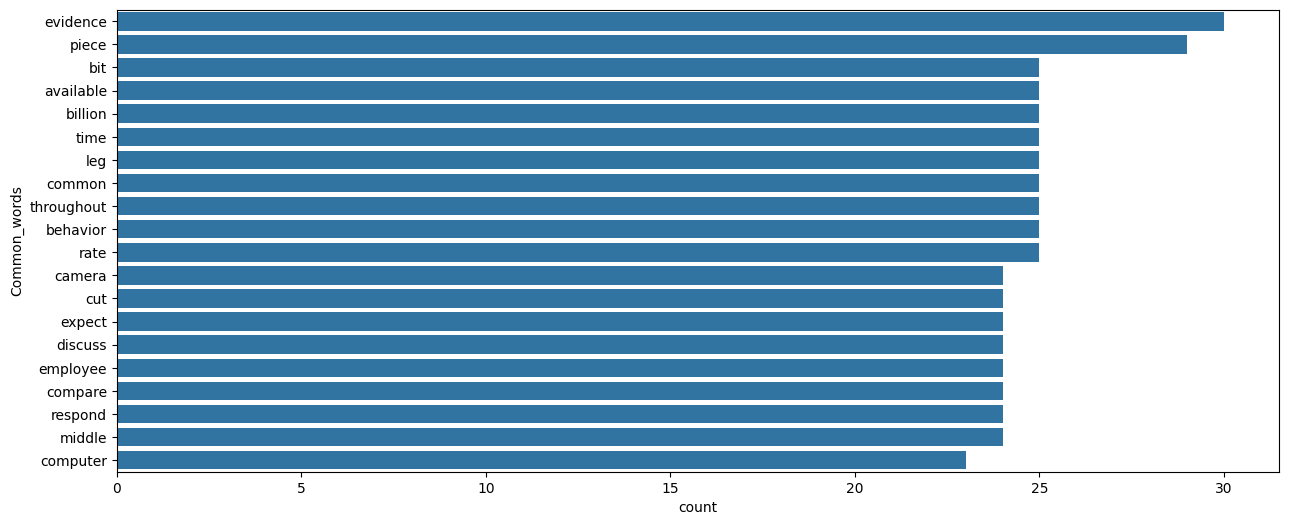

In [ ]:
#Sentiment Analysis

df_sentiment = df_ticket[['Ticket Description', 'Resolution', 'Ticket Priority', 'Ticket Subject', 'Resolution_bin']]
df_sentiment.head()

#Cleaning text

#Cleaning text
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[({})?/$#|=]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[.]', ' ', text)
    text = re.sub('[->]', ' ', text)
    text = re.sub('[:]', ' ', text)
    text = re.sub('[_]', ' ', text)
    text = re.sub('[,]', ' ', text)
    text = re.sub('[-]', ' ', text)
    text = re.sub('[\']', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

    #Apply texts were cleaned in 'Ticket Description' column
df_sentiment['Ticket Description'] = df_sentiment['Ticket Description'].apply(lambda x:clean_text(x))
df_sentiment['Resolution'] = df_sentiment['Resolution'].apply(lambda x:clean_text(x))
#Add useless words to stopwords
new_stopwords = ['i\'m', 'i\'ve', 'would', 'could', '-d', '-i\'m', '[--]:', 'not', 'mm', 'ca', 'cs', 'hi']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

#Write a funtion for removing stopwords
def remove_stopword(x):
    return [y for y in x if y not in stpwrd]

#Creat new column for Description Ticket
df_sentiment['temp1'] = df_sentiment['Ticket Description'].apply(lambda x:str(x).split())
df_sentiment['temp1'] = df_sentiment['temp1'].apply(lambda x:remove_stopword(x))
top = Counter([item for sublist in df_sentiment['temp1'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

#Plot into chart
plt.figure(figsize = (15,6))
sns.barplot(temp, y = 'Common_words', x = 'count')

df_sentiment_resolution = df_sentiment[df_sentiment['Resolution_bin'] == 'Yes']

df_sentiment_resolution['temp2'] = df_sentiment_resolution['Resolution'].apply(lambda x:str(x).split())
df_sentiment_resolution['temp2'] = df_sentiment_resolution['temp2'].apply(lambda x:remove_stopword(x))
top = Counter([item for sublist in df_sentiment_resolution['temp2'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

plt.figure(figsize = (15,6))
sns.barplot(temp, y = 'Common_words', x = 'count')

#Common words in description ticket per subject ticket

raw_text = [word for word_list in df_sentiment['temp1'] for word in word_list]

#Unique words funtion
def unique_word(sentiment, numwords, raw_words):
    allother = []
    for item in df_sentiment[df_sentiment.Resolution_bin != sentiment]['temp1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))

    specific = [x for x in raw_text if x not in allother]

    mycounter = Counter()

    for item in df_sentiment[df_sentiment.Resolution_bin == sentiment]['temp1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specific)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])

    return Unique_words

resolve = unique_word('Yes', 20, raw_text)
resolve.style.background_gradient(cmap='Greens')

none = unique_word('No', 20, raw_text)
none.style.background_gradient(cmap='Blues')

#Unique words in resolution
df_sentiment_resolution

def unique_word(sentiment, numwords, raw_words):
    allother = []
    for item in df_sentiment_resolution[df_sentiment_resolution.Resolution_bin != sentiment]['temp2']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))

    specific = [x for x in raw_text if x not in allother]

    mycounter = Counter()

    for item in df_sentiment_resolution[df_sentiment_resolution.Resolution_bin == sentiment]['temp2']:
        for word in item:
            mycounter[word] += 1
    keep = list(specific)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])

    return Unique_words

resolve = unique_word('Yes', 20, raw_text)
resolve.style.background_gradient(cmap='Greens')

<Axes: title={'center': 'WordCloud of ticket not resolved'}, xlabel='Interval', ylabel='Customer Satisfaction Rating'>

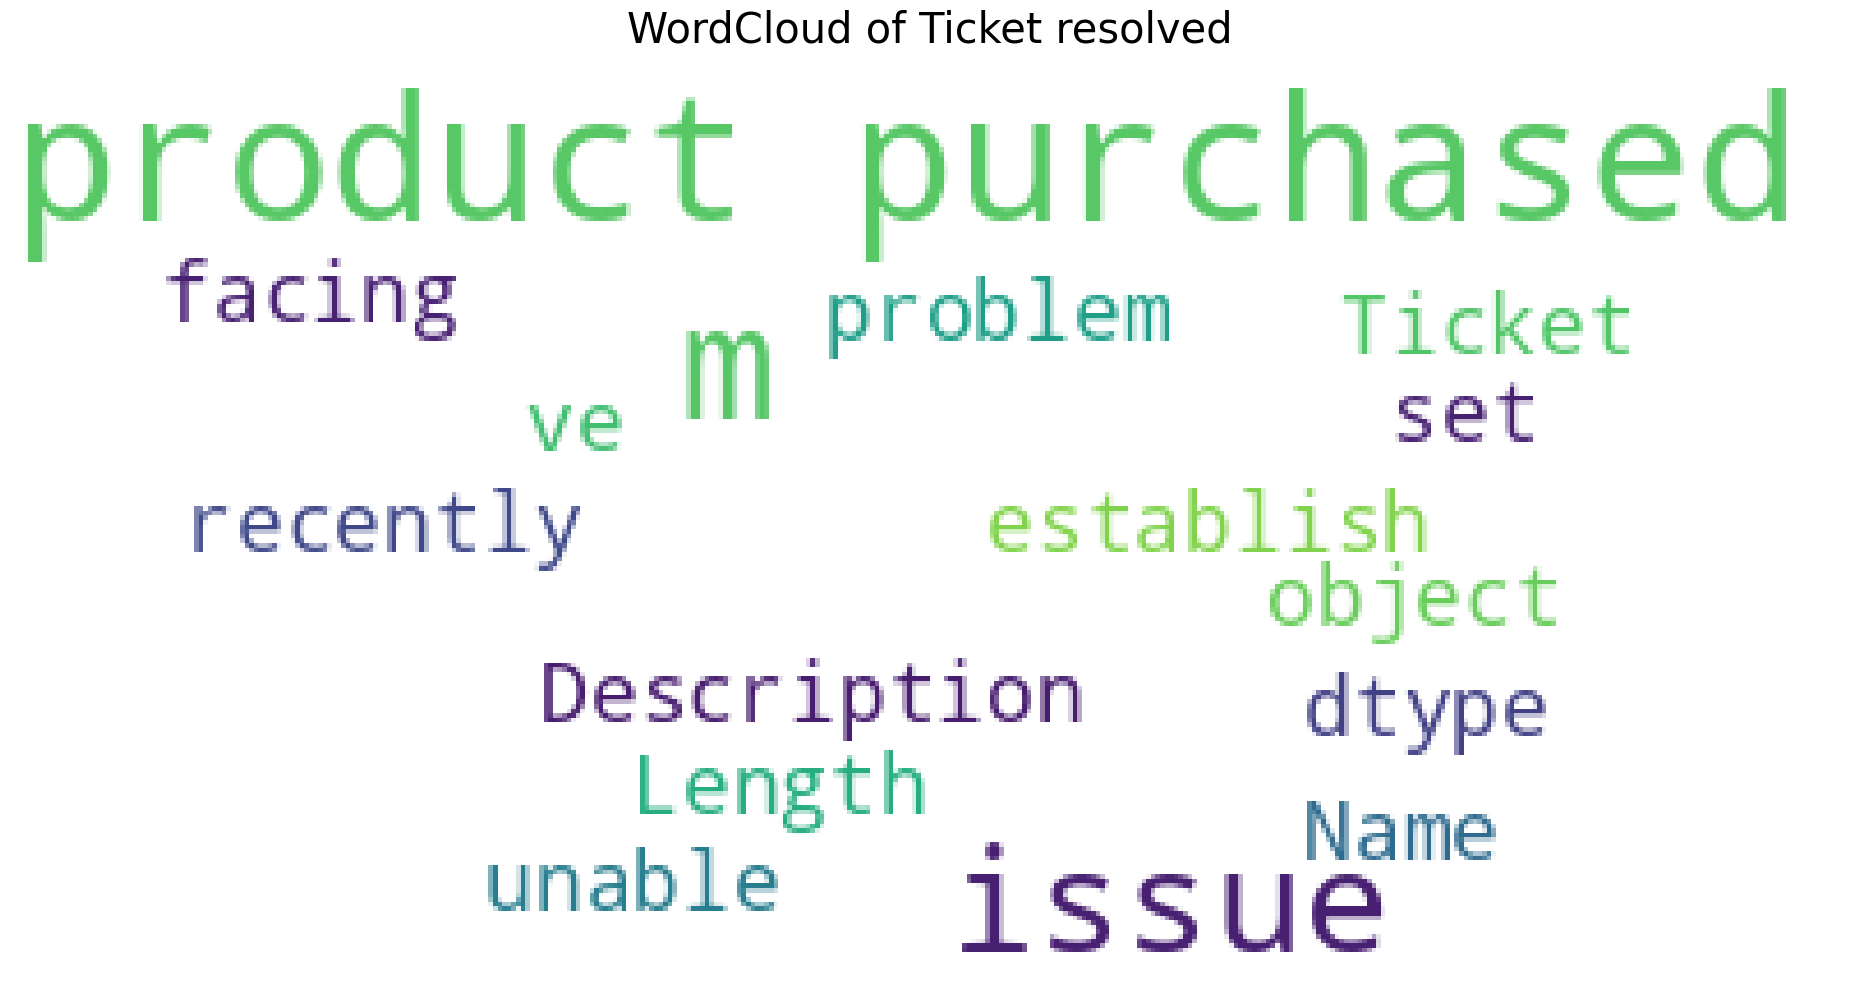

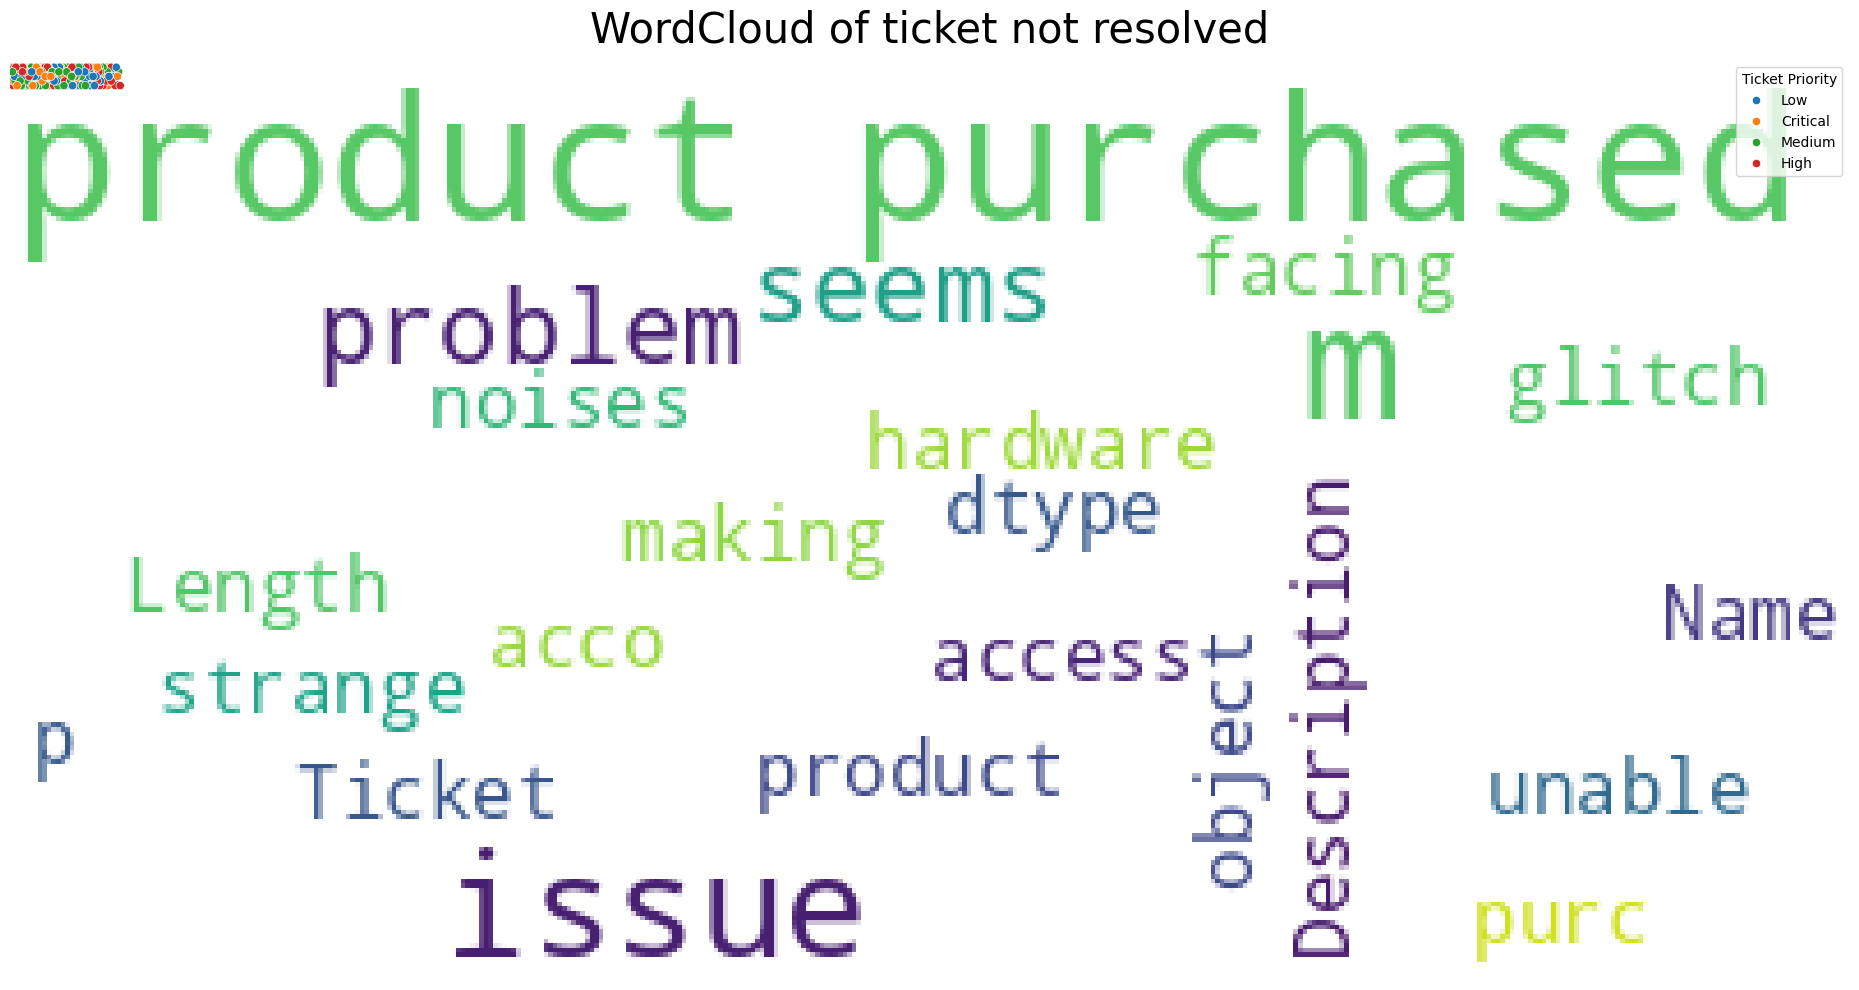

In [ ]:
#WordCloud
#Funtion
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=30, figure_size=(20,10), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)



    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=400,
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(df_sentiment[df_sentiment['Resolution_bin'] == 'Yes']['Ticket Description'],mask=None,color='white',max_font_size=50,title_size=30,title="WordCloud of Ticket resolved")

plot_wordcloud(df_sentiment[df_sentiment['Resolution_bin'] == 'No']['Ticket Description'],mask=None,color='white',max_font_size=50,title_size=30,title="WordCloud of ticket not resolved")

#Caculate the interval between time to resolution and first response time
df_resolution['Interval'] = df_resolution['Time to Resolution'] - df_resolution['First Response Time']

#Convert them into hours and float type
df_resolution['Interval'] = round(df_resolution['Interval'].dt.total_seconds()/(3600.0),2)

df_resolution['Interval'].describe()

sns.scatterplot(df_resolution[df_resolution['Interval'] > 0], x= 'Interval', y = 'Customer Satisfaction Rating', hue = 'Ticket Priority')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       115

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



<Axes: >

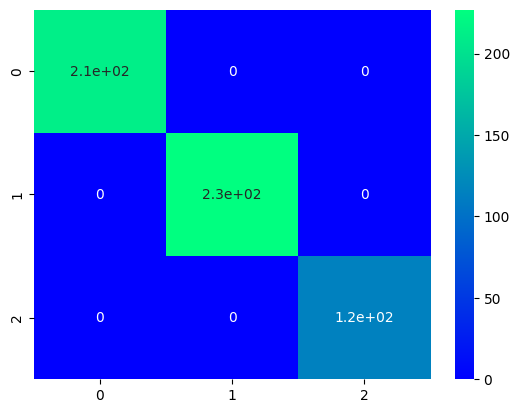

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix

label = df_resolution[['Customer Gender', 'Ticket Type', 'Ticket Subject', 'Ticket Priority', 'Ticket Channel', 'Type of Customer', 'Type of rating']]
encoder = LabelEncoder()
for col in label:
    value = np.unique(df_resolution[col])
    df_resolution[col] = encoder.fit_transform(df_resolution[col])
    encode_value = encoder.transform(value)

df_resolution.head()
y = df_resolution['Type of rating']
X = df_resolution.drop(columns = ['Customer Name', 'Customer Email', 'Customer Age', 'Product Purchased', 'Date of Purchase',
                                 'Ticket Description', 'Ticket Status', 'First Response Time', 'Time to Resolution', 'Response',
                                 'Resolution_bin' ,'Resolution'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, cmap = 'winter', annot = True)